In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pymystem3 import Mystem
import nltk

nltk.download("stopwords")
from nltk.corpus import stopwords

russian_stopwords = stopwords.words("russian")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ssamvelova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
movie_correlations = matrix.corr(method = 'pearson', min_periods = 80)

<AxesSubplot:xlabel='Наименование', ylabel='Наименование'>

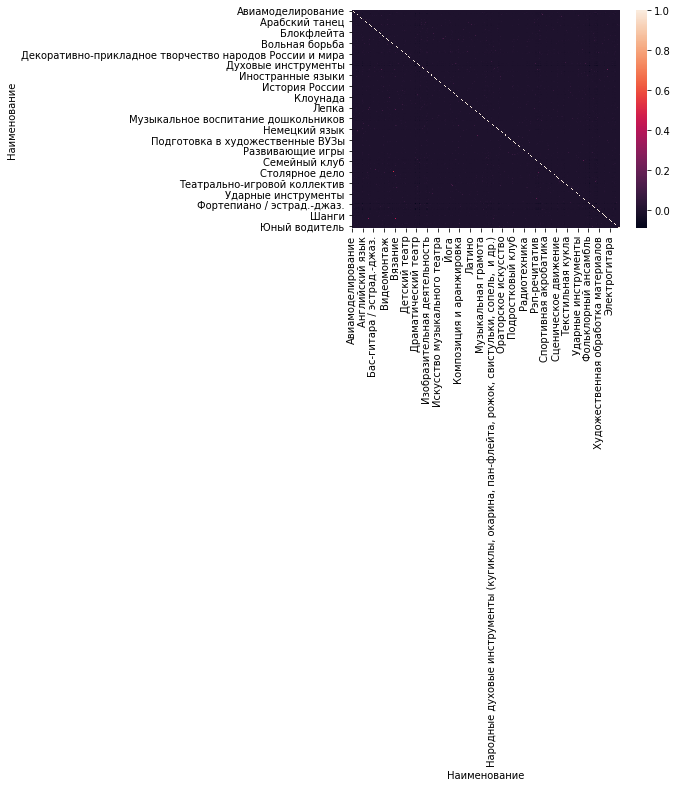

In [178]:
sns.heatmap(movie_correlations)

In [7]:
def tag_mystem(text='Текст нужно передать функции в виде строки!'):  
    m = Mystem()
    processed = m.analyze(text)
    tagged = []
    for w in processed:
        try:
            if w["analysis"]:
                lemma = w["analysis"][0]["lex"].lower().strip()
                pos = w["analysis"][0]["gr"].split(',')[0]
                pos = pos.split('=')[0].strip()
    #             print(lemma)
                if lemma not in set(russian_stopwords):
                    if pos in mapping:
                        tagged.append(lemma + '_' + mapping[pos]) # здесь мы конвертируем тэги
                    else:
                        tagged.append(lemma + '_X') # на случай, если попадется тэг, которого нет в маппинге
            else:
                continue
        except KeyError:
            continue # я здесь пропускаю знаки препинания, но вы можете поступить по-другому
    return tagged

In [8]:
def get_words_embed(name, model):
    res = []
    stems = tag_mystem(text=name)
    for word in stems:
        try:
            res.append(model.get_vector(word))
        except:
            print(word)
            continue
    return res

In [9]:
import requests
import re

url = 'https://raw.githubusercontent.com/akutuzov/universal-pos-tags/4653e8a9154e93fe2f417c7fdb7a357b7d6ce333/ru-rnc.map'

mapping = {}
r = requests.get(url, stream=True)
for pair in r.text.split('\n'):
    pair = re.sub('\s+', ' ', pair, flags=re.U).split(' ')
    if len(pair) > 1:
        mapping[pair[0]] = pair[1]

In [ ]:
dic_replace = {
    'фортепьяно': 'пианино',
    'звончатый': "звонкий",
    'домра': 'балалайка, струнный инструмент, русско-народный',
    'фотоискусство': 'фото искусство',
    'вокально-инструментальный': 'вокально инструментальный',
    'изо': "изобразительное искусство",
    "ушу": "боевые искусства азия",
    "капоэйр": "боевые искусства бразилия",
    "видеомонтаж": "видео монтаж",
    "батик": "декоратино-прикладное искусство, рисование по шёлку",
    "поинг": "жонглирование огненные мячи свет",
    "таеквандо": "боевые искусства азия",
    "блокфлейта": "флейта, духовые инструменты",
    "черлидинг": "спортивная гимнастика танцы болельщицы",
    "мини-футбол": "настольный футбол",
    "военно-исторический": "военно исторический",
    "историко": "история",
    "тайдзицюань": "боевые искусства азия китай",
    "игротека": "игры",
    "игротерапия": "игры терапия",
    "кугикл": "духовой инструмент, флейта, дудка, русско-народный, фольклор",
    "окарина": "свистулька духовой инструмент, флейта, дудка, русско-народный, фольклор",
    "сопель": "духовой инструмент, трубка, дудка, русско-народный, фольклор",
    "бисероплетение": "бисер ремесло прикладное искусство",
    "электромузыкальный": "электронная музыка",
    "войлоковаляние": "войлок ремесло прикладное искусство",
    "фламенко": "танец испания",
    "культуроведение": "культура",
    "джиу-джитсу": "боевые искусства азия бразилия",
    "квиллинг": "бумага аппликации декоративно прикладное искусство ремесло",
    "пирография": "гравюра декоратино прикладное искусство",
    "графика": "графический дизайн",
    "москвоведение": "москва история",
    "шанга": "",
    "лего": "игрушки конструктор игры",
    "ресайклинг": "переработка экология",
    "нод": "узел",
    "инклюзия": "",
    "йоинг": "",
    "танго": "танец аргентина",
    "файер": "огонь",
    "армреслинг": "боевые искусства спорт",
    "визаж": "макияж",
    "икебана": "япония искусство букеты цветы композиции",
    "военно-исторический": "военный, исторический",
    "мыловарение": "мало, изготовление, ремесло",
    "стритбол": "баскетбол",
    "авиаподгтовка": "авиа, подготовка",
    "авиамоделирование": "авиа, моделирование",
    "реслинг": "боевые искусства, спорт",
    "вайрворкинг": "проволока",
    "интерклуб": "закрытый клуб"
}

In [11]:
word_model = pd.read_pickle('word-model.pkl')

In [12]:
def get_words_embed(name, model):
    res = []
    stems = tag_mystem(text=name)
    for word in stems:
        try:
            res.append(model.get_vector(word))
        except:
            print(word)
            continue
    return res

In [13]:
def match_age_cat(text):
    if text == "0+":
        return [1, 1, 1, 1, 1]
    elif text == "6+":
        return [0, 1, 1, 1, 1]
    
    elif text == "12+":
        return [0, 0, 1, 1, 1]
    
    elif text == "16+":
        return [0, 0, 0, 1, 1]
    else:
        return [0, 0, 0, 0, 1]

In [14]:
def match_age_cat(text):
    if text == "0+":
        return [1, 1, 1, 1, 1]
    elif text == "6+":
        return [0, 1, 1, 1, 1]
    
    elif text == "12+":
        return [0, 0, 1, 1, 1]
    
    elif text == "16+":
        return [0, 0, 0, 1, 1]
    else:
        return [0, 0, 0, 0, 1]

In [83]:
df_embeds.head()

,name,name_embed,age_vector,final_embed
0,Хоровое пение,"[[-2.184097, 0.85660255, -0.001429447, 0.78891...","[0, 0, 1, 1, 1]","[-2.1840970516204834, -0.3622283935546875, -0...."
1,Хоровое пение,"[[-2.184097, 0.85660255, -0.001429447, 0.78891...","[0, 1, 1, 1, 1]","[-2.1840970516204834, -0.3622283935546875, -0...."
2,Хоровое пение,"[[-2.184097, 0.85660255, -0.001429447, 0.78891...","[0, 0, 0, 1, 1]","[-2.1840970516204834, -0.3622283935546875, -0...."
3,Хоровое пение,"[[-2.184097, 0.85660255, -0.001429447, 0.78891...","[0, 0, 0, 0, 1]","[-2.1840970516204834, -0.3622283935546875, -0...."
4,Хоровое пение,"[[-2.184097, 0.85660255, -0.001429447, 0.78891...","[1, 1, 1, 1, 1]","[-2.1840970516204834, -0.3622283935546875, -0...."


In [84]:
df_cats = pd.read_pickle("cats_embed.pkl").T.reset_index().rename(columns={'index':'name'})

In [214]:
def compose_embedd_vector(words, age):
    """
    Example:
    
    > words = np.array([[1, 2, 3], [-1, 0, 13], [0, 2, -3]])
    > array([[ 1,  2,  3],
             [-1,  0, 13],
             [ 0,  2, -3]])
           
    > age = np.array([1, 1, 1, 0, 0])
    > array([1, 1, 1, 0, 0])
    
    > compose_embedd_vector(words, age)
    > array([-1,  0, -3,  1,  2, 13,  1,  1,  1,  0,  0])
    """
    min_vec = words.min(axis=0)
    max_vec = words.max(axis=0)
    return np.concatenate((min_vec[0], max_vec[0], np.array(age)), axis=0)

In [215]:
def get_top_workshops(interest, age_category, df_cats, model, top=10):
    categories = df_cats.copy()
    embeddings = []
    age_category = np.array(match_age_cat(age_category))
    for word in interest:
        embeddings.append(get_words_embed(word, word_model))
    average_embedding = compose_embedd_vector(np.array(embeddings), np.array(age_category))
    all_vectors = df_cats.iloc[:, 1:].values
    categories['similarity'] = word_model.cosine_similarities(average_embedding, all_vectors)
    return ((categories.sort_values(by=['similarity'], ascending=False)).name[:10].values.tolist())

In [237]:
sample_interest = ["путешествие", "студент", "вязание"]
# df_embeds = pd.read_pickle("group_word_embed.pkl")
# df_embeds = df_embeds.dropna(subset=['final_embed'])
workshops = get_top_workshops(sample_interest, "12+", df_cats, word_model)
print(workshops)

['Народные духовые инструменты (кугиклы, окарина, пан-флейта, рожок, свистульки, сопель,  и др.)', 'Внеклассное чтение на английском языке', 'Занятия для лиц с ограниченными возможностями здоровья', 'Валяние из шерсти (войлоковаляние)', 'Занятия для школьников и подростков', 'Народные шумовые инструменты (бубны, колокольчики, ложки, рубель, трещотки и др.)', 'Поделки из вторичных материалов (ресайклинг)', 'Китайская гимнастика (цигун, тайдзицюань)', 'Квиллинг', 'Лего-конструирование и моделирование']


<AxesSubplot:xlabel='Наименование', ylabel='id_ученика'>

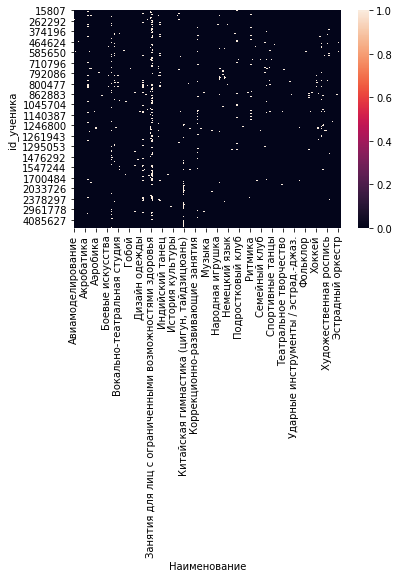

In [238]:
df_ids = df_master[df_master.Наименование.isin(workshops)].id_ученика.unique()
df_users = df_master[df_master.id_ученика.isin(df_ids)].pivot_table(index = 'id_ученика', columns = 'Наименование', values = 'visited').fillna(0)
sns.heatmap(df_users)

<AxesSubplot:xlabel='Наименование', ylabel='Наименование'>

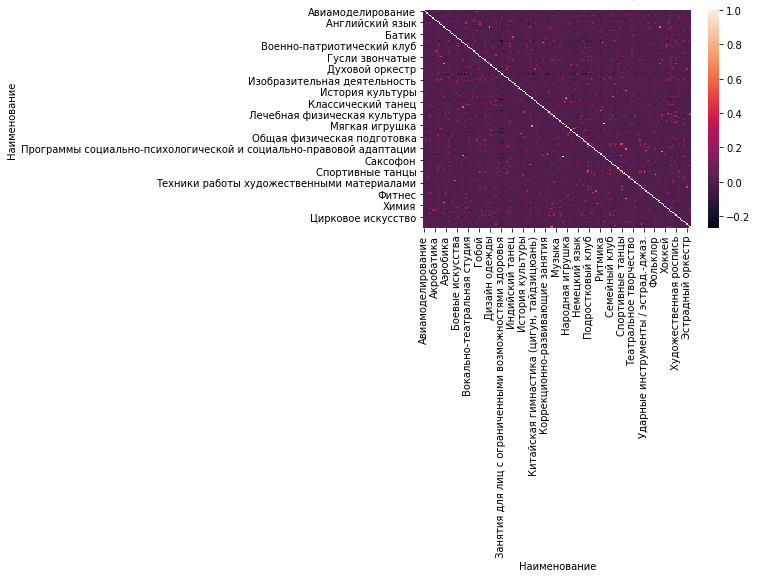

In [239]:
group_corrs = df_users.corr(method = 'pearson', min_periods = 80)
sns.heatmap(group_corrs)

In [241]:
group_corrs.sum().sort_values()[-10:]

Наименование
Эстрадно-джазовое пение              4.307581
Декоративно-прикладное творчество    4.316093
Компьютерная грамотность             4.439221
Стендовый моделизм                   4.517898
Правила дорожного движения           4.523861
Изобразительное искусство            4.927333
Подростковый клуб                    5.042443
Семейный клуб                        5.139326
Английский язык                      5.324892
Хореография                          5.398269
dtype: float64